<a href="https://colab.research.google.com/github/kritp144/CreditCard-Approval/blob/main/Project2_Pt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 2

KRIT PATEL

# CREDIT CARD APPROVAL:

The Task of this project is to create a prediction model that will determine whether or not a person gets approved for a credit card. The data was from Kaggle belonging to a UCI machine learning repository.

Source: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?select=clean_dataset.csv

# IMPORTING LIBRARIES AND LOADING THE DATA

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Loading the Data

data = '/content/drive/MyDrive/DATA SCIENCE/Project 2 Datasets/creditcard.csv'

df = pd.read_csv(data)

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


# PRE CLEANING DATA ANALYSIS

In [ ]:
# Check the Size of the Data

print('Rows, Columns')
df.shape 

Rows, Columns


(690, 16)

In [ ]:
# Check for Duplicates

print('Duplicated Values:')
df.duplicated().sum()

Duplicated Values:


0

In [ ]:
# Check the Data types and missing values of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
# Check for min and max values in numerical data

# Check for min and max age 
print('Min Age:', df['Age'].min())
print('Max Age:', df['Age'].max(), '\n')

# Check for min and max years employed
print('Min Years of Employment:', df['YearsEmployed'].min())
print('Max Years of Employment:', df['YearsEmployed'].max(), '\n')

# Check for min and max years employed
print('Min Debt:', df['Debt'].min())
print('Max Debt:', df['Debt'].max(), '\n')

# Check for min and max years employed
print('Min Credit Score:', df['CreditScore'].min())
print('Max Credit Score:', df['CreditScore'].max(), '\n')

Min Age: 13.75
Max Age: 80.25 

Min Years of Employment: 0.0
Max Years of Employment: 28.5 

Min Debt: 0.0
Max Debt: 28.0 

Min Credit Score: 0
Max Credit Score: 67 



In [ ]:
# Check for Categories in each Categorical columns

# Gender
print('Gender:')
print(df['Gender'].value_counts(), '\n')

# Married
print('Married:')
print(df['Married'].value_counts(), '\n')

# Bank Customer
print('Bank Customer:')
print(df['BankCustomer'].value_counts(), '\n')

# Industy
print('Industry:')
print(df['Industry'].value_counts(), '\n')

# Ethnicity
print('Ethnicity:')
print(df['Ethnicity'].value_counts(), '\n')

# Prior Default
print('Prior Default:')
print(df['PriorDefault'].value_counts(), '\n')

# Employed
print('Employed:')
print(df['Employed'].value_counts(), '\n')

# Credit Score
print('Credit Score:')
print(df['CreditScore'].value_counts(), '\n')

# Drivers License
print('Drivers License:')
print(df['DriversLicense'].value_counts(), '\n')

# Citizen
print('Citizen:')
print(df['Citizen'].value_counts(), '\n')

# Approved
print('Approved:')
print(df['Approved'].value_counts(), '\n') 

Gender:
1    480
0    210
Name: Gender, dtype: int64 

Married:
1    525
0    165
Name: Married, dtype: int64 

Bank Customer:
1    527
0    163
Name: BankCustomer, dtype: int64 

Industry:
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64 

Ethnicity:
White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64 

Prior Default:
1    361
0    329
Name: PriorDefault, dtype: int64 

Employed:
0    395
1    295
Name: Employed, dtype: int64 

Credit Score:
0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8

# DATA CLEANING 

There are no duplicated values, missing values or inconsistencies.

All Ordinal values have already been Ordinally Encoded.

Categorical Values in 'Ethnicity' and 'Citizen' column needs to be OneHotEncoded.

Numerical Values will all be scaled using a StandardScaler.

'Industry' and 'ZipCode' columns needs to be dropped as it isn't important to predict whether or not someone should get approved for a credit card based on the Industry they work in. Same applies to the Zip Code.

In [ ]:
# Define the Features as X and the Target as y

X = df.drop(columns= ['Industry', 'ZipCode', 'Approved'])
y = df['Approved'] 

In [ ]:
X.head() 

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,1,30.83,0.000,1,1,White,1.25,1,1,1,0,ByBirth,0
1,0,58.67,4.460,1,1,Black,3.04,1,1,6,0,ByBirth,560
2,0,24.50,0.500,1,1,Black,1.50,1,0,0,0,ByBirth,824
3,1,27.83,1.540,1,1,White,3.75,1,1,5,1,ByBirth,3
4,1,20.17,5.625,1,1,White,1.71,1,0,0,0,ByOtherMeans,0


In [ ]:
# Define the Colomn Selector

num_selector = make_column_selector(dtype_include= 'number')
cat_selector = make_column_selector(dtype_include= 'object')

In [ ]:
# Define the scaler and OneHotEncoder

scaler = StandardScaler()

ohe =  OneHotEncoder(sparse= False, handle_unknown= 'ignore')

In [ ]:
# Create appropriate pipelines

num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

In [ ]:
# Fit the pipelines and coloumn selectors in a tuple

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector) 

In [ ]:
# Fit the tuples into the column transformer

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efd48f80210>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efd48f23cd0>)])

# UNIVARIANT DATA VISUALIZATION

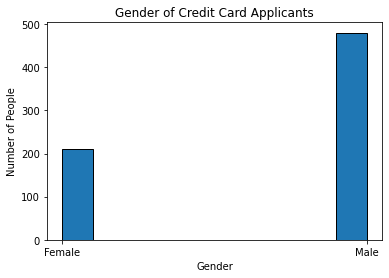

In [ ]:
# Histogram showing Gender

plt.hist(X['Gender'],
         edgecolor= 'Black');

plt.title('Gender of Credit Card Applicants');
plt.xlabel('Gender');
plt.ylabel('Number of People');

plt.xticks([0,1],['Female', 'Male']);

This graph shows us that we have more male clients than female, which may possibly create a bias when determining approval for credit cards

Text(0, 0.5, 'Number of People')

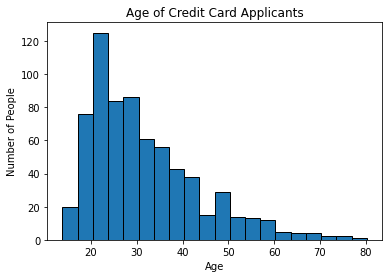

In [ ]:
# Histogram showing Age of Applicants

plt.hist(X['Age'],
         edgecolor= 'Black',
         bins= 'auto');

plt.title('Age of Credit Card Applicants')
plt.xlabel('Age')
plt.ylabel('Number of People')


This graph shows us that majority of the applicant age is under 60 with a few outliers over the age of 70

Text(0, 0.5, 'Number of People')

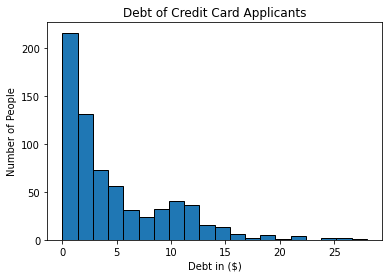

In [ ]:
# Histogram showing Debt of Applicants

plt.hist(df['Debt'],
         edgecolor= 'Black',
         bins= 'auto')

plt.title('Debt of Credit Card Applicants')
plt.xlabel('Debt in ($)')
plt.ylabel('Number of People')

This graph shows us that most applicants have debt under 15 dollars with a few outliers over 25 dollars

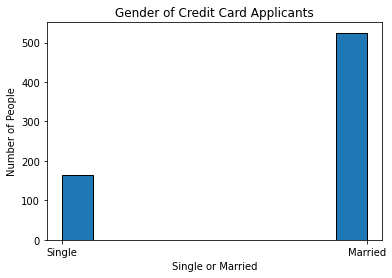

In [ ]:
# Histogram showing Married

plt.hist(X['Married'],
         edgecolor= 'Black');

plt.title('Gender of Credit Card Applicants');
plt.xlabel('Single or Married');
plt.ylabel('Number of People');

plt.xticks([0,1],['Single', 'Married']);

This data shows us whether or not the applicants are married or single. We can see that most of the applicants are married and therefore there may be a bias towards married when making predictions for approval

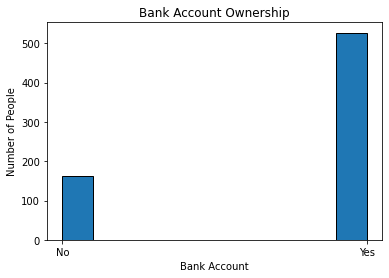

In [ ]:
# Histogram showing whether or not an applicant has a bank account

plt.hist(X['BankCustomer'],
         edgecolor= 'Black');

plt.title('Bank Account Ownership');
plt.xlabel('Bank Account');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This graph shows us whether or not the applicants have a bank account. The data here is skewed towards yes and therefore may have a bias towards it. 

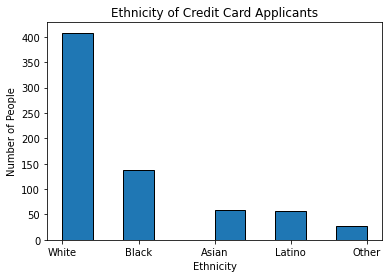

In [ ]:
# Histogram showing Ethnicity

plt.hist(X['Ethnicity'],
         edgecolor= 'Black');

plt.title('Ethnicity of Credit Card Applicants');
plt.xlabel('Ethnicity');
plt.ylabel('Number of People');



This graph shows us the diversity of applicants based on their Ethnicity. This dataset shows us that most of clients are caucasian or african american and therefore may have a bias towards those two ethnicities when predicting for approval.

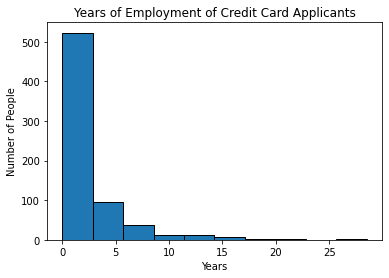

In [ ]:
# Histogram showing Years of Emplyment

plt.hist(X['YearsEmployed'],
         edgecolor= 'Black');

plt.title('Years of Employment of Credit Card Applicants');
plt.xlabel('Years');
plt.ylabel('Number of People');


This graph shows us that most of the applicants are fairly newly employed with a few outliers with that have been employed over 20 years

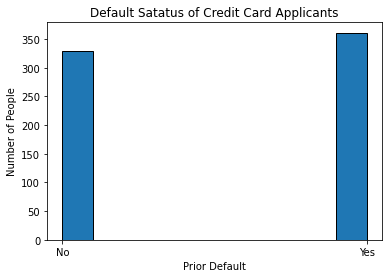

In [ ]:
# Histogram showing Prior Default

plt.hist(X['PriorDefault'],
         edgecolor= 'Black');

plt.title('Default Satatus of Credit Card Applicants');
plt.xlabel('Prior Default');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This shows us that we have the applicants who have defaulted a payment vs those that have not, is weighted pretty evenly. No bias here

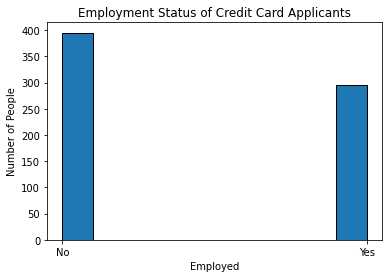

In [ ]:
# Histogram showing if applicants are Employed

plt.hist(X['Employed'],
         edgecolor= 'Black');

plt.title('Employment Status of Credit Card Applicants');
plt.xlabel('Employed');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This shows us that more applicants are unemployed than employed. May skew bias slightly when predicting for approval.

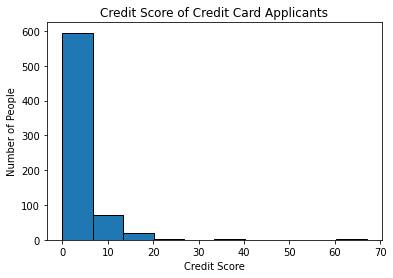

In [ ]:
# Histogram showing Credit Score

plt.hist(X['CreditScore'],
         edgecolor= 'Black');

plt.title('Credit Score of Credit Card Applicants');
plt.xlabel('Credit Score');
plt.ylabel('Number of People');

This graph shows us that majority of our data set has a low credit score. 

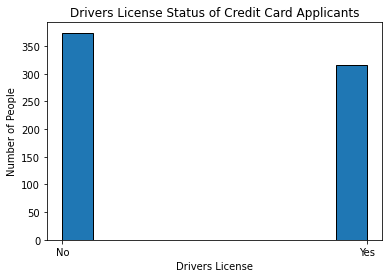

In [ ]:
# Histogram showing if applicants have a Drivers License

plt.hist(X['DriversLicense'],
         edgecolor= 'Black');

plt.title('Drivers License Status of Credit Card Applicants');
plt.xlabel('Drivers License');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This graph shows us that the data is pretty balanced on whether or not the applicants have a drivers license

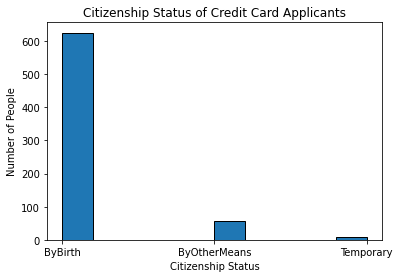

In [ ]:
# Histogram showing if applicants are Citizens

plt.hist(X['Citizen'],
         edgecolor= 'Black');

plt.title('Citizenship Status of Credit Card Applicants');
plt.xlabel('Citizenship Status');
plt.ylabel('Number of People');



This graph shows us that the data is very highly skewed towards applicants who obtained their citizenship by birth. This could influence a bias towards that when predicting for approval.

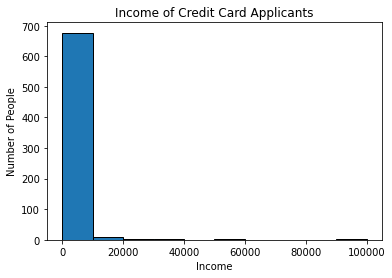

In [ ]:
# Histogram showing Income of Applicants

plt.hist(X['Income'],
         edgecolor= 'Black');

plt.title('Income of Credit Card Applicants');
plt.xlabel('Income');
plt.ylabel('Number of People');


This graph shows the income of applicants. There seems to be a very high bias towards people earning less than 20,000 dollars. This may influence the predictions on approval.

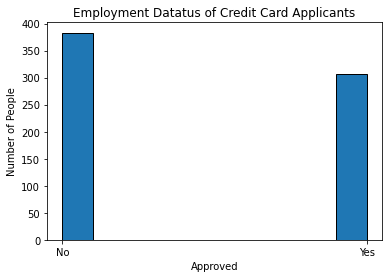

In [ ]:
# Histogram showing if applicants are Approved

plt.hist(y,
         edgecolor= 'Black');

plt.title('Employment Datatus of Credit Card Applicants');
plt.xlabel('Approved');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This graph shows us that more people got denied for a credit card than approved. 

# CORRELATION GRAPH

In [ ]:
# Correlate the data

corr = df.corr().round(2)

<Figure size 720x576 with 0 Axes>

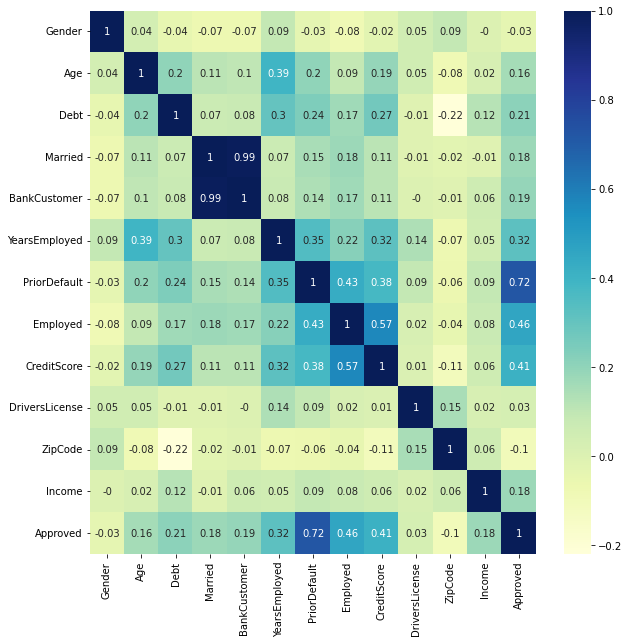

<Figure size 720x576 with 0 Axes>

In [ ]:
# Make a heatmap
plt.figure(figsize= (10,10))
sns.heatmap(corr, cmap = 'YlGnBu', annot= True);
plt.figure(figsize = (10,8))

This heat map shows the correlation within the data. Strong correlations are shown by the blues, weak corrrelations are shown in yellow. This graph shows us that there is a strong correlation between 'Credit Score' and whether or not a person is 'Employed'. There is also a strong correlation between 'Approval' and 'Prior Default'. This means that when we predict for approval, there will be bias present based on whether or not a person has a prior default.

# MULTIVARIANT EXPLORATORY VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


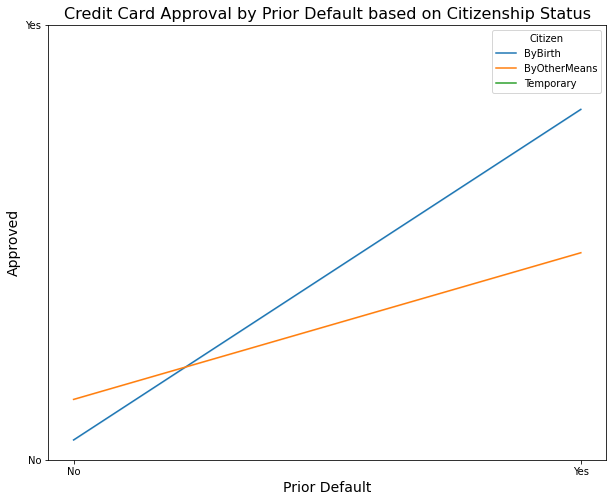

In [ ]:
# Approval based on Prior Defaults

plt.figure(figsize=(10,8))
ax = sns.lineplot(X['PriorDefault'],y,
                   ci= 0,
                   hue= X['Citizen']);

plt.title('Credit Card Approval by Prior Default based on Citizenship Status', fontsize= 16);
plt.xlabel('Prior Default', fontsize= 14);
plt.ylabel('Approved', fontsize= 14);
plt.xticks([0,1],['No','Yes']);
plt.yticks([0,1],['No','Yes']);


This line graph shows us most applicants with a prior default have a good chance getting a credit card approved. It also indicates that if you have no prior default, chances of denial are also low.

However, the graph shows that applicants with a prior default who achieve their citizenship by birth have a higher chance of being approved than those who achieve their citizenship through other means. This is indicative by the difference in sample size between the three categories conducted in the univariant analysis of 'Citizen' column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


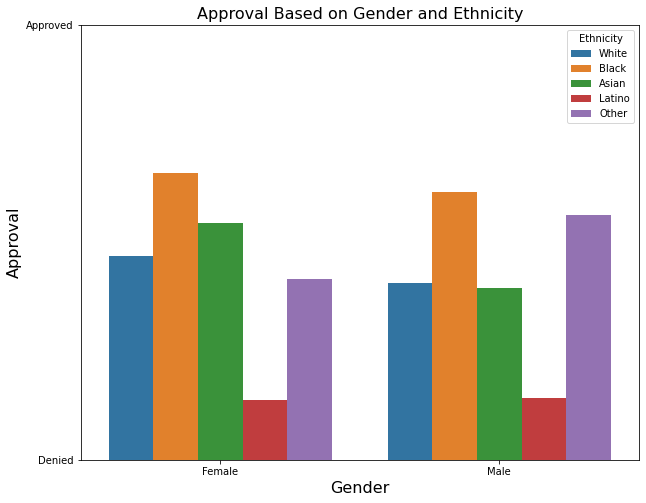

In [ ]:
# Aproval based on Gender and Ethnicity

plt.figure(figsize=(10,8))
ax = sns.barplot(X['Gender'], y,
                 ci= 0,
                 hue= X['Ethnicity']);

plt.title('Approval Based on Gender and Ethnicity', fontsize= 16);
plt.xlabel('Gender', fontsize= 16);
plt.ylabel('Approval', fontsize= 16);
plt.yticks([0,1],['Denied', 'Approved']);
plt.xticks([0,1],['Female', 'Male']);

This Bar Chart shows us the approval of applicants based on their Gender and ethnicity. It indicates that women are more likely to get approved than men in most ethnic groups except for 1.

It also indicates that Latinos are significantly less likely to be approved than other ethnicitied. This could form a bias when predicting for approval as the dataset does not contain a big enough sample for Latinos as observed in the univariable analysis if the  'Ethnicity' Column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


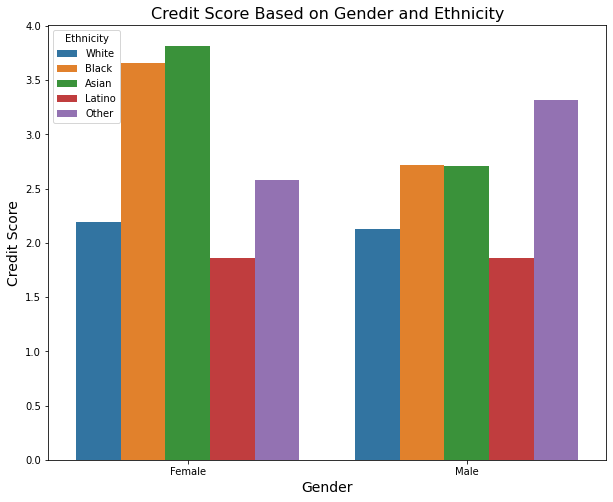

In [1264]:
# Credit Score based on Gender and Ethnicity

plt.figure(figsize=(10,8))
ax = sns.barplot(X['Gender'], X['CreditScore'],
                 ci= 0,
                 hue= X['Ethnicity']);

plt.title('Credit Score Based on Gender and Ethnicity', fontsize= 16);
plt.xlabel('Gender', fontsize= 14);
plt.ylabel('Credit Score', fontsize= 14);
plt.xticks([0,1],['Female', 'Male']);

This barchart shows us the Credit Score of applicants based on their Gender and Ethnicity. It illustrates that out of all ethnicities, Black and Asian applicants have the highest credit scores, with women on average having a higher credit score than men.  

# STAKEHOLDER VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


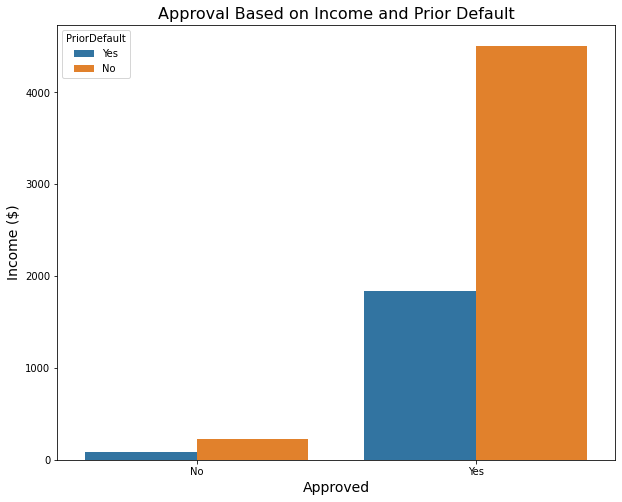

In [ ]:
# Approval Based in Income and Prior Default

p = {0: 'No',
     1: 'Yes'}

priordefault = X['PriorDefault'].replace(p)

plt.figure(figsize=(10,8))
ax = sns.barplot(y, X['Income'],
                 ci= 0,
                 hue= priordefault);

plt.title('Approval Based on Income and Prior Default', fontsize= 16);
plt.xlabel('Approved', fontsize= 14);
plt.ylabel('Income ($)', fontsize= 14);
plt.xticks([0,1],['No', 'Yes']);


This graph indicates that all applicants with an income of more than $ 1000 got approved regarless of whether or not they have defaulted on a payment in the past. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


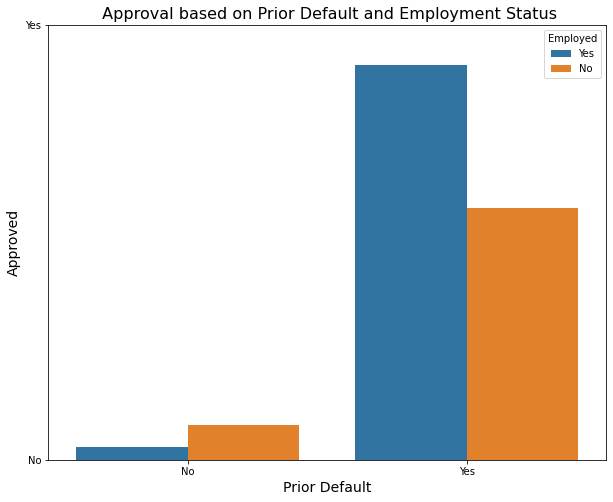

In [1274]:
# Approval based on Prior Default and Employment Status

e = {0 : 'No',
     1 : 'Yes'}

employed = X['Employed'].replace(e)

plt.figure(figsize=(10,8))
ax = sns.barplot(X['PriorDefault'],y,
                 ci= 0,
                 hue= employed);

plt.title(' Approval based on Prior Default and Employment Status', fontsize= 16);
plt.xlabel('Prior Default', fontsize= 14);
plt.ylabel('Approved', fontsize= 14);
plt.yticks([0,1],['No', 'Yes']);
plt.xticks([0,1],['No', 'Yes']);

This barchart indicates that applicants with a prior default who are employed are more likely to get approved for a credit card. It also indicates that for those who do not have a prior default,however small the sample may be, the applicants that are not employeed are more likely to get approved for a credit card.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


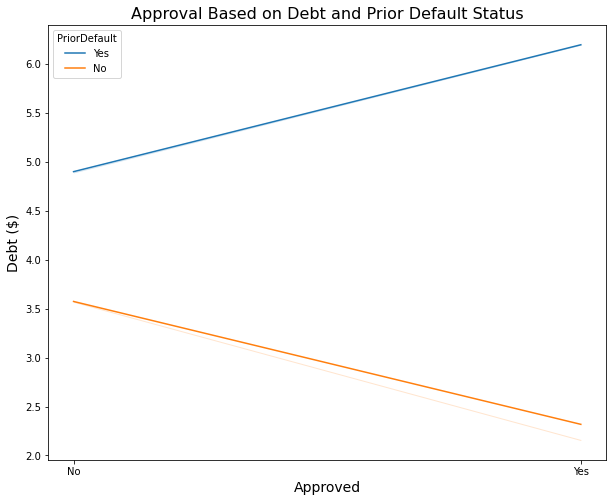

In [1276]:
# Approval based on Debt and Prior Default Status

plt.figure(figsize=(10,8))
ax = sns.lineplot(y, X['Debt'],
                 ci = 0,
                 hue= priordefault);

plt.title('Approval Based on Debt and Prior Default Status', fontsize= 16);
plt.xlabel('Approved', fontsize= 14);
plt.ylabel('Debt ($)', fontsize= 14);
plt.xticks([0,1],['No', 'Yes']);

This line graph indicates that applicants who have a prior default, the higher the debt, the more likey they are to get approved, while as for the applicants that do not have a prior default, the lower the debt, the  higher the chances are for their approval.

# PREPARING DATA FOR MODELING

In [ ]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,1,30.83,0.000,1,1,White,1.25,1,1,1,0,ByBirth,0
1,0,58.67,4.460,1,1,Black,3.04,1,1,6,0,ByBirth,560
2,0,24.50,0.500,1,1,Black,1.50,1,0,0,0,ByBirth,824
3,1,27.83,1.540,1,1,White,3.75,1,1,5,1,ByBirth,3
4,1,20.17,5.625,1,1,White,1.71,1,0,0,0,ByOtherMeans,0


This dataset contains information regarding gender, relationship status, citzenship status, and ethnicity that wouldn't be necesarry to predict whether or not an applicant got approved. 

Using such features could possibly form a bias if one category represents a larger proportion of the dataset. Forming a bias based on gender, ethnicity or whether or not the applicant is married or a citizen would be unethical and should be avoided.

Therefore, in order to avoid such biases, these features will be removed from the predictive model

In [ ]:
# Remove features from the X dataset

X = X.drop(columns= ['Gender', 'Married', 'Ethnicity', 'Citizen'])

X.head()

,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
0,30.83,0.000,1,1.25,1,1,1,0,0
1,58.67,4.460,1,3.04,1,1,6,0,560
2,24.50,0.500,1,1.50,1,0,0,0,824
3,27.83,1.540,1,3.75,1,1,5,1,3
4,20.17,5.625,1,1.71,1,0,0,0,0


In [ ]:
# Define the Scaler

scaler = StandardScaler()

# Perform a Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state= 42)

# PRECTION MODELS TO USE

In order to make predictions for credit card approvals, we will analize three different models. Each model will be used three times. Once without tuning for parameters, once tuning the parameter, and once with pca clustering the data on the tuned model.

The models used for predictions are:


1.   Logistical Regression Model
2.   Random Forest Model
3.   K Nearest Neighbor



# LOGISTICAL REGRESSION MODELS

UNTUNED LOGISTICAL REGRESSION MODEL

In [ ]:
# Define the LR Model

lr = LogisticRegression()

# Make lr pipeline

lr_pipe = make_pipeline(preprocessor, lr)

In [ ]:
# Fit the model

lr_pipe.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967c910>)])),
                ('logisticregression', LogisticRegression())])

In [ ]:
# Make a prediction

%%time
lr_testpred = lr_pipe.predict(X_test)

CPU times: user 4.67 ms, sys: 10 µs, total: 4.68 ms
Wall time: 5.14 ms


In [ ]:
# Accuracy Score test

train_lrscore = lr_pipe.score(X_train, y_train)
test_lrscore = lr_pipe.score(X_test, y_test)

print('Logistical Regression Training Score Accuracy', train_lrscore)
print('Logistical Regression Testing Score Accuracy', test_lrscore) 

Logistical Regression Training Score Accuracy 0.8684719535783365
Logistical Regression Testing Score Accuracy 0.8439306358381503


TUNED LOGISTICAL REGRESSION MODEL

In [ ]:
# Define the GridSearch Parameters

param = [{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'max_iter': [1000],
         'solver':['liblinear'],
         'penalty': ['l1', 'l2']}
         ]

# Fit Parameters into the Logistical Regression Model  

lr_gridsearch = GridSearchCV(lr, param_grid= param)

# Make and fit a Tuned LR pipeline

tuned_lrpipe = make_pipeline(preprocessor, lr_gridsearch)

In [ ]:
# Fit the tuned model

tuned_lrpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967c910>)])),
                ('gridsearchcv',
                 GridSearchCV(estimator=LogisticRegression(),
  

In [ ]:
# Time the Prediction
 
%%time
tunedlr_testpred = tuned_lrpipe.predict(X_test)

CPU times: user 4.38 ms, sys: 6 µs, total: 4.39 ms
Wall time: 4.03 ms


In [ ]:
# Accuracy Score test

train_tunedlrscore = tuned_lrpipe.score(X_train, y_train)
test_tunedlrscore = tuned_lrpipe.score(X_test, y_test)

print('Tuned Logistical Regression Training Score Accuracy', train_tunedlrscore)
print('Tuned Logistical Regression Testing Score Accuracy', test_tunedlrscore) 

Tuned Logistical Regression Training Score Accuracy 0.8684719535783365
Tuned Logistical Regression Testing Score Accuracy 0.8497109826589595


PCA TUNED LOGISTICAL REGRESSION MODEL

In [ ]:
# Make a PCA Pipeline

pca = PCA(n_components= .99)

pca_pipe = make_pipeline(preprocessor, pca)

# Make a PCA Tuned LR Pipeline

pca_lrpipe = make_pipeline(pca_pipe, lr_gridsearch)

In [ ]:
# Fit the new pipline

pca_lrpipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                      

In [ ]:
# Time the Prediction
 
%%time
pcalr_testpred = pca_lrpipe.predict(X_test)

CPU times: user 6.86 ms, sys: 0 ns, total: 6.86 ms
Wall time: 6.88 ms


In [ ]:
# Accuracy Score test

train_pcalrscore = pca_lrpipe.score(X_train, y_train)
test_pcalrscore = pca_lrpipe.score(X_test, y_test)

print('PCA Tuned Logistical Regression Training Score Accuracy', train_pcalrscore)
print('PCA Tuned Logistical Regression Testing Score Accuracy', test_pcalrscore) 

PCA Tuned Logistical Regression Training Score Accuracy 0.8684719535783365
PCA Tuned Logistical Regression Testing Score Accuracy 0.8497109826589595


# RANDOM FOREST MODELS

UNTUNED RANDOM FOREST MODEL

In [ ]:
# Define the Rf Model

rf = RandomForestClassifier()

# Make Rf pipeline

rf_pipe = make_pipeline(preprocessor, rf) 

In [ ]:
# Fit the model

rf_pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967c910>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
# Make a prediction

%%time
rf_testpred = rf_pipe.predict(X_test)

CPU times: user 31.7 ms, sys: 12 µs, total: 31.8 ms
Wall time: 31.5 ms


In [ ]:
# Accuracy Score test

train_rfscore = rf_pipe.score(X_train, y_train)
test_rfscore = rf_pipe.score(X_test, y_test)

print('Random Forest Training Score Accuracy', train_rfscore)
print('Random Forest Testing Score Accuracy', test_rfscore) 

Random Forest Training Score Accuracy 0.9980657640232108
Random Forest Testing Score Accuracy 0.8670520231213873


TUNED RANDOM FOREST MODEL

In [ ]:
# Define the GridSearch Parameters

param = [{'max_depth': range(15,30),
          'min_samples_leaf': [3,15,20],}
         ]

# Fit Parameters into the Logistical Regression Model  

rf_gridsearch = GridSearchCV(rf, param_grid= param)

# Make and fit a Tuned RF pipeline

tuned_rfpipe = make_pipeline(preprocessor, rf_gridsearch)

In [ ]:
# Fit the tuned model

tuned_rfpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967c910>)])),
                ('gridsearchcv',
                 GridSearchCV(estimator=RandomForestClassifier()

In [ ]:
# Time the Prediction
 
%%time
tunedrf_testpred = tuned_rfpipe.predict(X_test)

CPU times: user 24 ms, sys: 1.02 ms, total: 25 ms
Wall time: 26.3 ms


In [ ]:
# Accuracy Score test

train_tunedrfscore = tuned_rfpipe.score(X_train, y_train)
test_tunedrfscore = tuned_rfpipe.score(X_test, y_test)

print('Tuned Random Forest Training Score Accuracy', train_tunedrfscore)
print('Tuned Random Forest Testing Score Accuracy', test_tunedrfscore)

Tuned Random Forest Training Score Accuracy 0.9458413926499033
Tuned Random Forest Testing Score Accuracy 0.861271676300578


PCA TUNED RANDOM FOREST MODEL

In [ ]:
# Make a PCA Tuned RF Pipeline

pca_rfpipe = make_pipeline(pca_pipe, rf_gridsearch)

In [ ]:
# Fit the new pipline

pca_rfpipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                      

In [ ]:
# Time the Prediction
 
%%time
pcarf_testpred = pca_rfpipe.predict(X_test)

CPU times: user 28.2 ms, sys: 4.05 ms, total: 32.3 ms
Wall time: 35.9 ms


In [ ]:
# Accuracy Score test

train_pcarfscore = pca_rfpipe.score(X_train, y_train)
test_pcarfscore = pca_rfpipe.score(X_test, y_test)

print('PCA Tuned Random Forest Training Score Accuracy', train_pcarfscore)
print('PCA Tuned Random Forest Testing Score Accuracy', test_pcarfscore) 

PCA Tuned Random Forest Training Score Accuracy 0.9458413926499033
PCA Tuned Random Forest Testing Score Accuracy 0.8034682080924855


# K NEAREST NEIGHBORS MODEL

UNTUNED K NEAREST NEIGHBOR MODEL





In [ ]:
# Define the KNN Model

knn = KNeighborsClassifier()

# Make Rf pipeline

knn_pipe = make_pipeline(preprocessor, knn) 

In [ ]:
 # Fit the model

knn_pipe.fit(X_train, y_train)  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967c910>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Make a prediction

%%time
knn_testpred = knn_pipe.predict(X_test)

CPU times: user 12.3 ms, sys: 4 µs, total: 12.3 ms
Wall time: 12.5 ms


In [ ]:
# Accuracy Score test

train_knnscore = knn_pipe.score(X_train, y_train)
test_knnscore = knn_pipe.score(X_test, y_test)

print('K Nearest Neighbor Score Accuracy', train_knnscore)
print('K Nearest Neighbor Testing Score Accuracy', test_knnscore) 

K Nearest Neighbor Score Accuracy 0.8762088974854932
K Nearest Neighbor Testing Score Accuracy 0.8265895953757225


TUNED K NEAREST NEIGHBOR MODEL

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# Define the GridSearch Parameters

param = [{'n_neighbors': range(1,25),
          'p': range(1,5),
         'weights': ['uniform','distance']}] 
         

# Fit Parameters into the Logistical Regression Model  

knn_gridsearch = GridSearchCV(knn, param_grid= param)

# Make and fit a Tuned KNN pipeline

tuned_knnpipe = make_pipeline(preprocessor, knn_gridsearch)

In [ ]:
# Fit the tuned model

tuned_knnpipe.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967cc50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4967c910>)])),
                ('gridsearchcv',
                 GridSearchCV(estimator=KNeighborsClassifier(),


In [ ]:
# Time the Prediction
 
%%time
tunedknn_testpred = tuned_knnpipe.predict(X_test)

In [ ]:
# Accuracy Score test

train_tunedknnscore = tuned_knnpipe.score(X_train, y_train)
test_tunedknnscore = tuned_knnpipe.score(X_test, y_test)

print('K Nearest Neighbor Training Score Accuracy', train_tunedknnscore)
print('K Nearest Neighbor Testing Score Accuracy', test_tunedknnscore)

PCA TUNED K NEAREST NEIGHBOR MODEL

In [ ]:
# Make a PCA Tuned RF Pipeline

pca_knnpipe = make_pipeline(pca_pipe, knn_gridsearch)

In [ ]:
# Fit the new pipline

pca_knnpipe.fit(X_train,y_train)

In [ ]:
# Time the Prediction
 
%%time
pcaknn_testpred = pca_knnpipe.predict(X_test)

In [ ]:
# Accuracy Score test

train_pcaknnscore = pca_knnpipe.score(X_train, y_train)
test_pcaknnscore = pca_knnpipe.score(X_test, y_test)

print('PCA Tuned K Nearest Neighbor Training Score Accuracy', train_pcaknnscore)
print('PCA Tuned K Nearest Neighbor Testing Score Accuracy', test_pcaknnscore) 

# MODEL EVALUATION

In [ ]:
# Print training and testing scores of each model

print('Logistical Regression Training Score Accuracy', train_lrscore)
print('Logistical Regression Testing Score Accuracy', test_lrscore, '\n') 

print('Tuned Logistical Regression Training Score Accuracy', train_tunedlrscore)
print('Tuned Logistical Regression Testing Score Accuracy', test_tunedlrscore, '\n')

print('PCA Tuned Logistical Regression Training Score Accuracy', train_pcalrscore)
print('PCA Tuned Logistical Regression Testing Score Accuracy', test_pcalrscore, '\n')

print('Random Forest Training Score Accuracy', train_rfscore)
print('Random Forest Testing Score Accuracy', test_rfscore,'\n') 

print('Tuned Random Forest Training Score Accuracy', train_tunedrfscore)
print('Tuned Random Forest Testing Score Accuracy', test_tunedrfscore, '\n')

print('PCA Tuned Random Forest Training Score Accuracy', train_pcarfscore)
print('PCA Tuned Random Forest Testing Score Accuracy', test_pcarfscore, '\n')

print('K Nearest Neighbor Score Accuracy', train_knnscore)
print('K Nearest Neighbor Testing Score Accuracy', test_knnscore, '\n') 

print('K Nearest Neighbor Training Score Accuracy', train_tunedknnscore)
print('K Nearest Neighbor Testing Score Accuracy', test_tunedknnscore, '\n')

print('PCA Tuned K Nearest Neighbor Training Score Accuracy', train_pcaknnscore)
print('PCA Tuned K Nearest Neighbor Testing Score Accuracy', test_pcaknnscore) 

From the scores above, the best model to use for predictions is the Tuned Random Forest. This model has high accuracy scores as well as minimum variance between the training and testing scores.

Methods to further improve predictability include:

1. Further tuning the hyperparameters
2. Trying a different model
3. Introducing more data
4. Introducing new features that have a correlation with the Target.
